In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
import networkx as nx
warnings.filterwarnings("ignore")

from parameters import *
from global_vars import *
from agent import *
from setup import *
from go import *
from MODEL import *

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
# EXPERIMENT GENERATION

n_sim = 2 # number of simulations
exp = experiment(5) # experiment with n_sim is setup
exp.run_experiment() # experiment with n_sim is run

Simulation completed!!! There were 0 errors


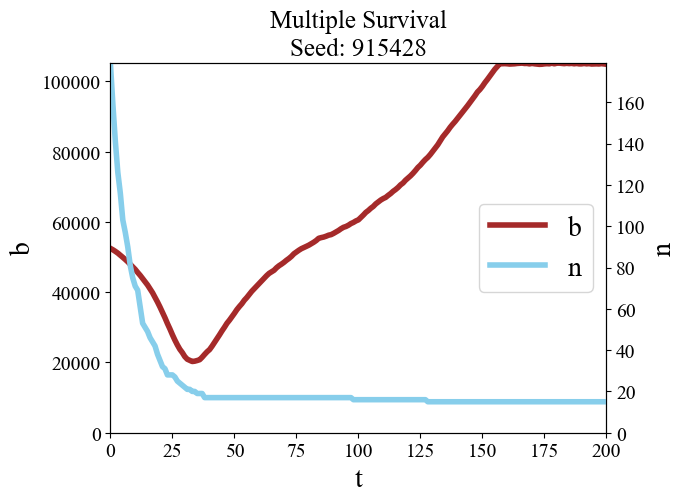

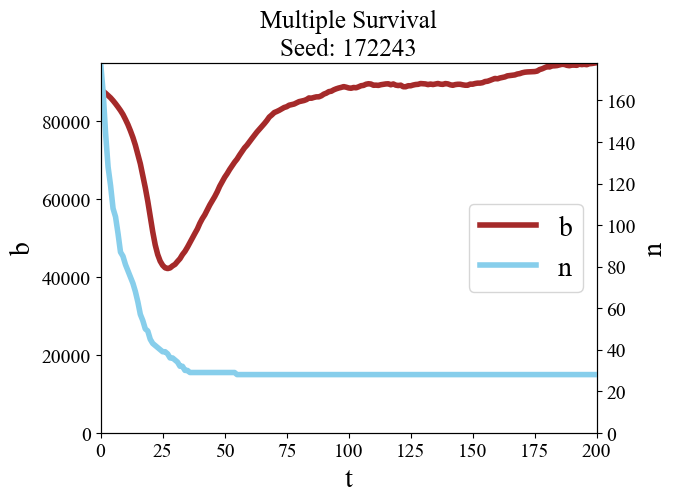

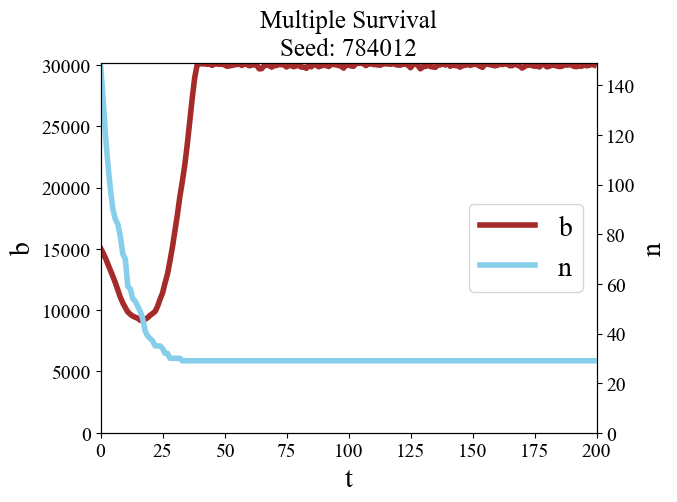

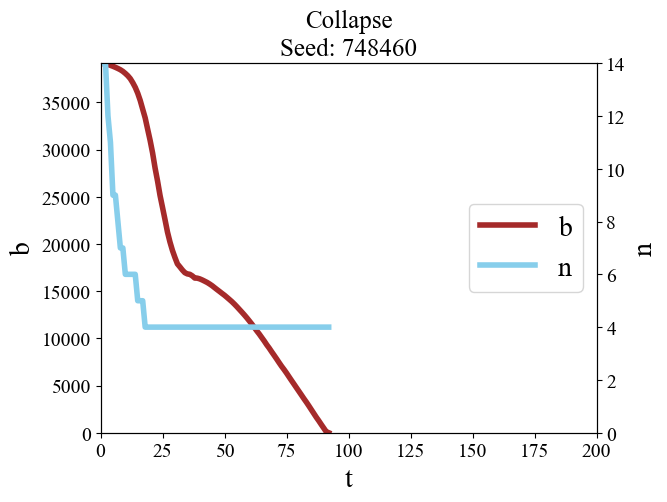

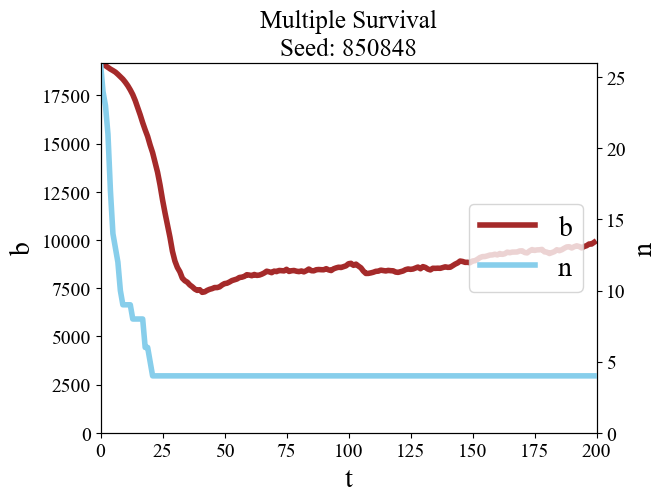

In [14]:
# SHOW TIME SERIES OF RANDOM SIMULATIONS

def plot_ts(mod, seed):

    ts_b, ts_n = mod.gv.brown_ts, mod.gv.n_players_ts

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.set_xlim(0, 200)
    ax2.set_xlim(0, 200)
    ax1.set_ylim(0, max(ts_b))
    ax2.set_ylim(0, max(ts_n))

    curve1, = ax1.plot(ts_b, c = 'brown', label='b', linewidth=4)
    curve2, = ax2.plot(ts_n, c = 'skyblue', label='n', linewidth=4)

    ax1.tick_params(axis='both', labelsize=14)
    ax2.tick_params(axis='both', labelsize=14)

    handles = [curve1, curve2]
    labels = [curve.get_label() for curve in handles]

    plt.legend(handles, labels, fontsize=20, loc='center right')

    ax1.set_xlabel('t', fontsize=20)
    ax1.set_ylabel('b', fontsize=20)
    ax2.set_ylabel('n', fontsize=20)


    if ts_b[len(ts_b) - 1] == 0: 
        title = 'Collapse'
    elif ts_n[len(ts_b) - 1] == 1: 
        title = 'One Winner'
    else: 
        title = "Multiple Survival"
    
    title = title + '\nSeed: ' + str(seed)
    ax1.set_title(title, fontsize=18)

    plt.show()

def model_run():

    seed = np.random.randint(0, 1000000)
    mod = model(seed)
    exp.generate_inputs(mod)
    mod.run(seed)
    return mod, seed

n_sim = 5
for _ in range(n_sim):
    mod, seed = model_run()
    plot_ts(mod, seed)

